<a href="https://colab.research.google.com/github/ymuto0302/base1_2021/blob/main/opendata2_corona_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# オープンデータの活用(」：新型コロナウイルス陽性者データ(1)
東京都，神奈川県，北海道，大阪府等，多くの自治体が新型コロナウイルス(COVID-19)に関するデータをオープンデータとして公開している。

### 福岡県が提供するデータ
「福岡県オープンデータサイト」
https://www.open-governmentdata.org/fukuoka-pref/
にて各種データが提供されている。

このサイトにおいて，陽性者発表情報は

https://ckan.open-governmentdata.org/dataset/401000_pref_fukuoka_covid19_patients

に置かれている。ここからデータをダウンロードし，fukuoka_covid19_patients.csv へファイル名変更し，以下で用いる。

fukuoka_covid19_patients.csv の冒頭は以下のとおり：

```
No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,居住地,年代,性別,感染経路不明,濃厚接触者,海外渡航歴有
1,400009,福岡県,,2020/02/20,木,,福岡市中央区,60代,男性,1,,
2,400009,福岡県,,2020/02/20,木,,福岡市中央区,60代,女性,,1,
3,400009,福岡県,,2020/03/01,日,,北九州市小倉南区,60代,男性,1,,
4,400009,福岡県,,2020/03/17,火,,福岡市南区,30代,女性,,,1
5,400009,福岡県,,2020/03/19,木,,宗像市,30代,女性,,,1
6,400009,福岡県,,2020/03/23,月,,北九州市小倉北区,40代,男性,1,,
7,400009,福岡県,,2020/03/24,火,,福岡市早良区,40代,男性,1,,
8,400009,福岡県,,2020/03/24,火,,飯塚市,30代,男性,1,,
9,400009,福岡県,,2020/03/24,火,,飯塚市,30代,女性,,1,
```


### Google Drive のマウント

In [1]:
# Google Drive のマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### CSVファイルからのデータの読み込み
福岡県の新型コロナのデータは UTF-8 で記述されている。
また，シンプルなヘッダゆえ，encoding 以外のオプションは不要である。

In [2]:
import pandas as pd # データ解析ライブラリ Pandas のインポート

# CSV ファイルからデータ読み込み
df = pd.read_csv("/content/drive/My Drive/BASE/OpenData/fukuoka_covid19_patients.csv", encoding="utf-8")

In [3]:
df.head() # 結果確認のため，先頭の５行のみ表示

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,居住地,年代,性別,感染経路不明,濃厚接触者,海外渡航歴有
0,1,400009.0,福岡県,NaN,2020/02/20,木,NaN,福岡市中央区,60代,男性,1.0,NaN,NaN
1,2,400009.0,福岡県,NaN,2020/02/20,木,NaN,福岡市中央区,60代,女性,NaN,1.0,NaN
2,3,400009.0,福岡県,NaN,2020/03/01,日,NaN,北九州市小倉南区,60代,男性,1.0,NaN,NaN
3,4,400009.0,福岡県,NaN,2020/03/17,火,NaN,福岡市南区,30代,女性,NaN,NaN,1.0
4,5,400009.0,福岡県,NaN,2020/03/19,木,NaN,宗像市,30代,女性,NaN,NaN,1.0


### 必要なデータ項目の選別
公表年月日，居住地，年代，性別を取り出すこととする。

**「絞り込むデータ項目」の指定にあたり，loc() メソッドを用いる。 loc() メソッドでは引数に列名を指定する。**

In [4]:
# 公表_年月日，居住地，年代，性別のみを取り出す
df = df.loc[:, ["公表_年月日", "居住地", "年代", "性別"]]
df.head() # 結果確認のため，先頭を表示

,公表_年月日,居住地,年代,性別
0,2020/02/20,福岡市中央区,60代,男性
1,2020/02/20,福岡市中央区,60代,女性
2,2020/03/01,北九州市小倉南区,60代,男性
3,2020/03/17,福岡市南区,30代,女性
4,2020/03/19,宗像市,30代,女性


### ピポット(pivot)を用いた並べ替え
目標は，「リリース日および年代でグループ化して，"患者数(6月1日, 40代)=3人" のような構造を作る」ことにある。

そこで Pandas のピボット機能を用いる。

In [5]:
df["カウント"] = 1 # 可視化の際に利用するため，個々の患者に 1 を割り振る

# 行と列を指定してピボット（再形成）
# ここでは「年代」を列としてデータを並べ替えている
df_pivot = df.pivot(columns="年代", values="カウント")

# 元データの「公表_年月日」と pivot により並べ替えたデータを結合する
df = pd.concat([df["公表_年月日"], df_pivot], axis=1)

df.head() # 結果確認のため，先頭の５行のみ表示

,公表_年月日,NaN,-,10代,10歳未満,20代,30代,40代,50代,60代,70代,80代,90代以上,調査中
0,2020/02/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,2020/02/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,2020/03/01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,2020/03/17,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/03/19,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### データを強引に並べ替える
上記のデータフレームを眺めて分かるように，「10歳未満」と「10代」の順序が不適当である。また，年代に値のないデータが含まれるため，"NaN" や "ー"，さらに "調査中" という表記も見える。

そこで，分析対象とする年代を 10〜80代に限定し，かつ強引にデータを並べ替える。

In [6]:
# ヒートマップ作成へ向けて，データの(強制的な)並べ替え
df = df[["公表_年月日", "10代", "20代", "30代", "40代", "50代", "60代", "70代", "80代"]]

df.head() # 結果確認のため，先頭の５行のみ表示

,公表_年月日,10代,20代,30代,40代,50代,60代,70代,80代
0,2020/02/20,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,2020/02/20,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,2020/03/01,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,2020/03/17,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,2020/03/19,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


### 値のない箇所をゼロで埋める
上記の結果において，０行目は 60代，１行目も 60代，３行目は 30代の陽性者が検出されたことを示す。
ここでは１人の陽性者に１つの行を割り当てているため，当該の年代以外の列は値を持たない。

故に，NaN と表示された部分を全てゼロで埋める。

この際に利用する関数が「fillna」である。ここで "fillna" とは「NaN の部分を（ゼロで）fill する」という意味をもつ。

In [7]:
# 値のない箇所をゼロで埋める
df = df.fillna(0)

df.head() # 結果確認のため，先頭の５行のみ表示

,公表_年月日,10代,20代,30代,40代,50代,60代,70代,80代
0,2020/02/20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020/02/20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2020/03/01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2020/03/17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2020/03/19,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0




---



# ここで一息！
ここまで loc()関数，pivot()関数，fillna()関数を用いて，
個々の陽性者の情報を年代毎の数値に置き換えてきた。

直前の結果において，０行目と１行目は同一の「2020年2月20日」に検出された「２名の60代陽性者」を表しており，これらをまとめて「2020年2月20日には 60代が２名，陽性であった」という形でまとめたい。さらに上記には表示されていないが，「2021年◯月◯日は 20代が３名，40代が１名，陽性であった」という形でまとめたい。

また，データフレーム df には 2020年2月〜2021年4月までの膨大なデータが収められており，１年以上の期間をひと括りに分析するのは得策でない。

そこで，以下では次の操作を行う。

1. 「公表_年月日」を利用した，分析対象期間の絞り込み (datetime 関数を利用)
1. 「公表_年月日」でグループ化し，各日の患者数の合計を求める (Pandas の groupyby 関数を利用)
1. ヒートマップを用いた可視化 (matplotlib の pcolor 関数を利用)






---



### 「公表_年月日」を利用した，分析対象期間の絞り込み
福岡県での COVID-19 陽性者検出は 2020年2月に始まり，現時点で１年間を超えるデータが蓄積されている。
この間，第１波，第２波および第３波が到来しており，過去のデータを一括して取り上げるのは適切でない。

そこで「公表_年月日」を利用し，特定の期間のデータのみを取り出す。
具体的には**第１波の生じた期間「2020年3月30日〜2020年4月30日」を対象**とする。

ここで月日による選別を行うため，**「公表_年月日」を予め datetime 型に変換する必要**がある。

(注) 以下で用いる datetime モジュールは日付・時間データを取り扱うライブラリである。datetime 型へ変換することで，月日による大小比較が可能となる。

In [8]:
# 特定の期間のデータのみを取り出す

import datetime as dt # 日付・時間データを取り扱うライブラリ

# 「公表_年月日」を datetime 型に型変換する
df['公表_年月日'] = pd.to_datetime(df['公表_年月日'])

# 第１波である，2020年3月20日〜2020年4月30日のデータのみ抽出する
# df = df[df['公表_年月日'] >= dt.datetime(2020, 11, 1)]  # 第３波
condition = (dt.datetime(2020, 3, 30) <= df['公表_年月日']) & (df['公表_年月日'] <= dt.datetime(2020, 4, 30))
# condition = (dt.datetime(2020, 11, 1) <= df['公表_年月日']) & (df['公表_年月日'] <= dt.datetime(2021, 2, 28))
df_1st = df.copy() # 元データ (データフレーム df）を再利用できるよう，コピーをとる
df_1st = df_1st[condition]

df_1st.head()

,公表_年月日,10代,20代,30代,40代,50代,60代,70代,80代
26,2020-03-30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27,2020-03-30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28,2020-03-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,2020-03-31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30,2020-03-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 「公表_年月日」でグループ化し，各日の患者数の合計を求める
「公表_年月日」をキーとして，groupby() 関数を適用，かつ sum() 関数により合計を求める。

In [9]:
# 「公表_年月日」でグループ化し，各日の合計を求める
df_1st = df_1st.groupby("公表_年月日").sum()

df_1st.head()

,10代,20代,30代,40代,50代,60代,70代,80代
公表_年月日,,,,,,,,
2020-03-30,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-31,1.0,4.0,4.0,2.0,2.0,1.0,0.0,1.0
2020-04-01,1.0,11.0,7.0,3.0,3.0,4.0,2.0,1.0
2020-04-02,1.0,2.0,2.0,3.0,4.0,2.0,4.0,2.0
2020-04-03,0.0,1.0,6.0,4.0,5.0,3.0,0.0,0.0


In [10]:
df_1st.head()

,10代,20代,30代,40代,50代,60代,70代,80代
公表_年月日,,,,,,,,
2020-03-30,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-31,1.0,4.0,4.0,2.0,2.0,1.0,0.0,1.0
2020-04-01,1.0,11.0,7.0,3.0,3.0,4.0,2.0,1.0
2020-04-02,1.0,2.0,2.0,3.0,4.0,2.0,4.0,2.0
2020-04-03,0.0,1.0,6.0,4.0,5.0,3.0,0.0,0.0


以上により，各月日において，各年代の陽性者数が集計された。

### ヒートマップを用いた可視化
福岡県における第１波での COVID-19 陽性者の年代別・月日別ヒートマップを作成する。

- plt.figfure : 図領域の設定。ここでは横幅として 6，縦幅として 10 を指定した。
- plt.pcolor() : ヒートマップの生成。ここでカラーマップとして "Reds" を指定した。
- plt.yticks() : y軸の設定。y軸には index，すなわち「公表_年月日」を割り当てる。
- plt.xticks() : x軸の設定。x軸には columns，すなわち「10代，20代，・・・，80代」を割り当てる。
- plt.show() : ヒートマップの表示。

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0, flags=flags)


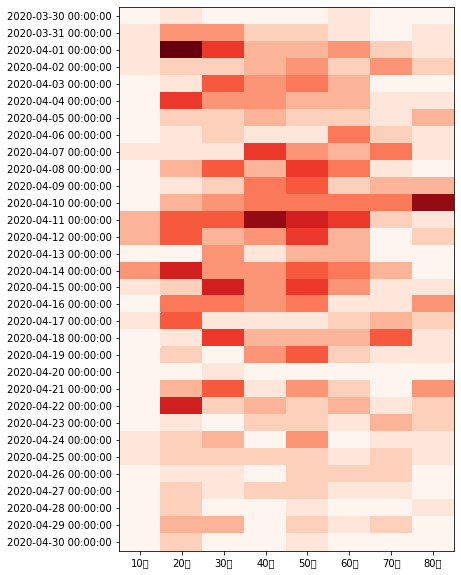

In [11]:
# 可視化：ヒートマップの生成
import matplotlib.pyplot as plt # 可視化ライブラリ
import numpy as np # 数値解析ライブラリ (可視化の際に少しだけ使う)

plt.figure(figsize=(6,10))
plt.pcolor(df_1st, cmap="Reds")
plt.yticks(np.arange(0.5, len(df_1st.index), 1), df_1st.index)
plt.xticks(np.arange(0.5, len(df_1st.columns), 1), df_1st.columns)
plt.gca().invert_yaxis() # y軸の向きを上下逆さまにする
plt.show()

## 以上をまとめたコード

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0, flags=flags)


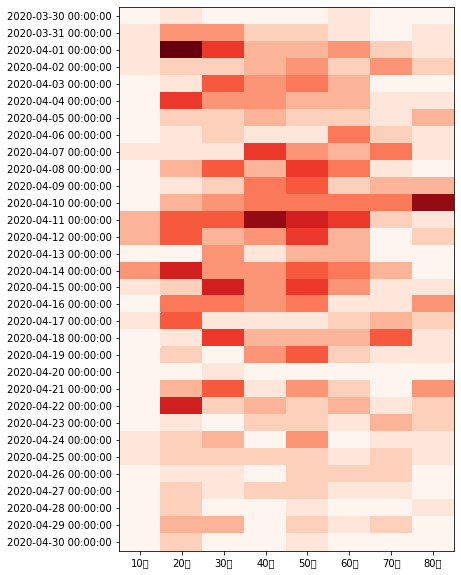

In [12]:
import pandas as pd # データ解析ライブラリ Pandas のインポート

# CSV ファイルからデータ読み込み
df = pd.read_csv("/content/drive/My Drive/BASE/OpenData/fukuoka_covid19_patients.csv", encoding="utf-8")

# 公表_年月日，居住地，年代，性別のみを取り出す
df = df.loc[:, ["公表_年月日", "居住地", "年代", "性別"]]

df["カウント"] = 1 # 可視化の際に利用するため，個々の患者に 1 を割り振る

# 行と列を指定してピボット（再形成）
# ここでは「年代」を列としてデータを並べ替えている
df_pivot = df.pivot(columns="年代", values="カウント")

# 元データの「公表_年月日」と pivot により並べ替えたデータを結合する
df = pd.concat([df["公表_年月日"], df_pivot], axis=1)

# ヒートマップ作成へ向けて，データの(強制的な)並べ替え
df = df[["公表_年月日", "10代", "20代", "30代", "40代", "50代", "60代", "70代", "80代"]]

# 値のない箇所をゼロで埋める
df = df.fillna(0)

#################################################
# 特定の期間のデータのみを取り出す

import datetime as dt # 日付・時間データを取り扱うライブラリ

# 「公表_年月日」を datetime 型に型変換する
df['公表_年月日'] = pd.to_datetime(df['公表_年月日'])

# 第１波である，2020年3月20日〜2020年4月30日のデータのみ抽出する
# df = df[df['公表_年月日'] >= dt.datetime(2020, 11, 1)]  # 第３波
condition = (dt.datetime(2020, 3, 30) <= df['公表_年月日']) & (df['公表_年月日'] <= dt.datetime(2020, 4, 30))
# condition = (dt.datetime(2020, 11, 1) <= df['公表_年月日']) & (df['公表_年月日'] <= dt.datetime(2021, 2, 28))
df_1st = df.copy() # 元データ (データフレーム df）を再利用できるよう，コピーをとる
df_1st = df_1st[condition]

# 「公表_年月日」でグループ化し，各日の合計を求める
df_1st = df_1st.groupby("公表_年月日").sum()

#################################################
# 可視化：ヒートマップの生成
import matplotlib.pyplot as plt # 可視化ライブラリ
import numpy as np # 数値解析ライブラリ (可視化の際に少しだけ使う)

plt.figure(figsize=(6,10))
plt.pcolor(df_1st, cmap="Reds")
plt.yticks(np.arange(0.5, len(df_1st.index), 1), df_1st.index)
plt.xticks(np.arange(0.5, len(df_1st.columns), 1), df_1st.columns)
plt.gca().invert_yaxis() # y軸の向きを上下逆さまにする
plt.show()

# 課題
1. 福岡県を襲った第２波，第３波において，いずれの年代の陽性者が多かったか，ヒートマップから見い出せ。
2. 東京都のデータを対象とし，福岡県データの解析と同様，第１波〜第４波それぞれの年代別感染状況を分析せよ。

以上について，レポートにまとめてください。
レポートの中身は以下のとおりとする。すなわち，第１波〜第４波のそれぞれについて，分析期間（いつからいつまでが第１波か？）を定め，ヒートマップを示すと共に結果に対する考察を行うこと。

- 分析期間：◯年◯月◯日〜◯年◯月◯日
- 実行結果：ヒートマップを貼り付ける
- 考察：実行結果に関する考察を行う

(注) 第１波〜第４波については，前回の課題「陽性者数の推移」のうち，「リッチな可視化」で取り上げた Plotly Express による結果を利用するとよいだろう。